In [3]:
#Find the directory in which you are working to get the data 
pwd

'/mnt/c/Users/hp/venv/Untitled Folder'

In [4]:
#import data
import pandas as pd

data=pd.read_csv("/mnt/c/Users/hp/venv/untitled.txt")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [34]:
#Get information about data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Check if any value is null
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

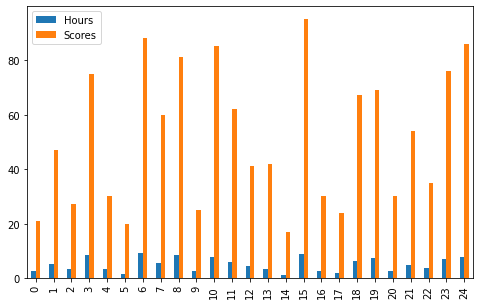

In [7]:
#Visualize key features and value to be predicted
from matplotlib import pyplot as plt
data.plot(kind='bar',figsize=(8,5))
plt.show()

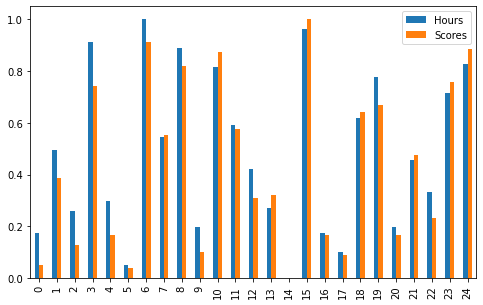

In [8]:
#Before visualizing normalize data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
norm_data=data[['Hours', 'Scores']].copy()
norm_data[['Hours','Scores']]=scaler.fit_transform(norm_data[['Hours','Scores']])#list
norm_data.plot(kind='bar',figsize=(8,5))
plt.show()

In [9]:
#Find correlation between feature
norm_data['Hours'].corr(norm_data['Scores'])

0.9761906560220888

Minimum:1.10
Mean:5.01
Median:4.80
Mode:2.50
Maximum:9.20



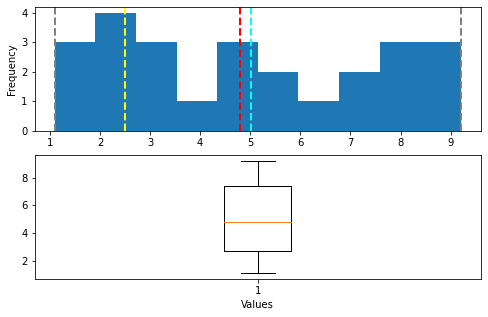

Minimum:17.00
Mean:51.48
Median:47.00
Mode:30.00
Maximum:95.00



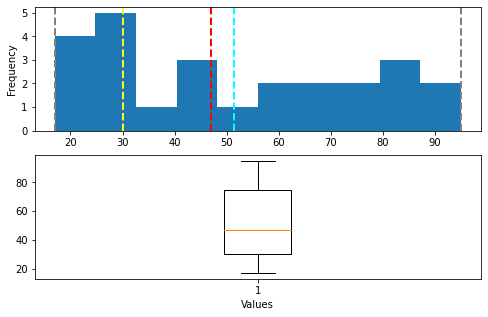

In [10]:
#Now visualize data with histogram and boxplot
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    max_d=var_data.max()
    min_d=var_data.min()
    mean_d=var_data.mean()
    median_d=var_data.median()
    mode_d=var_data.mode()[0]
    
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_d,
                                                                                            mean_d,
                                                                                            median_d,
                                                                                            mode_d,
                                                                                            max_d))
    fig,ax=plt.subplots(2,1,figsize=(8,5))
    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")
    
    ax[0].axvline(x=min_d, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_d, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_d, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_d, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_d, color = 'gray', linestyle='dashed', linewidth = 2)
    
    ax[1].boxplot(var_data)
    ax[1].set_xlabel("Values")
    
    plt.show()
    
show_distribution(data['Hours']) 
show_distribution(data['Scores'])

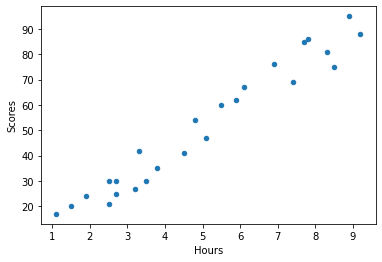

In [11]:
#make a scatter plot for feature vs value to be predicted
data.plot.scatter(x='Hours',y='Scores',)
plt.show()

Slope:9.78
Intercept:2.48
0.98
0.00
0.45



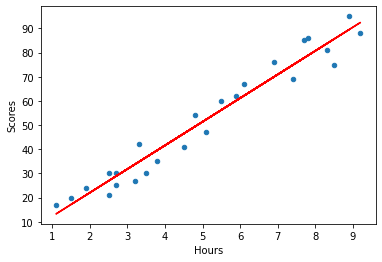

In [24]:
#find regression coefficients of the line which will give us our desired results
from scipy import stats

df_regression=data[['Hours', 'Scores']].copy()

m,b,r,p,se=stats.linregress(df_regression['Hours'],df_regression['Scores'])
print('Slope:{:.2f}\nIntercept:{:.2f}\n{:.2f}\n{:.2f}\n{:.2f}\n'.format(m,b,r,p,se))

df_regression['fx']=(m*df_regression['Hours'])+b
df_regression['error']=df_regression['fx']- df_regression['Scores']
df_regression.plot.scatter(x='Hours',y='Scores')
plt.plot(df_regression['Hours'],df_regression['fx'],color='red')
plt.show()

In [36]:
#Find mean error
l=df_regression['error'].mean()
l

-1.7053025658242404e-15

In [32]:
#Using the regression coefficients for predicting the desired result
def f(x):
    m=9.78
    b=2.48
    return m*x+b
study_time=9.25
prediction=f(study_time)
expected_score=max(0,min(100,prediction))
print("Score: ",expected_score,"\nRange of score is in between:",expected_score-1.71," to ",expected_score+1.7)

Score:  92.945 
Range of score is in between: 91.235  to  94.645
